In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


# Reading and Cleaning Data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print(os.listdir('../input/vu-dmt-assigment-2-2023/'))

['submission_sample.csv', 'test_set_VU_DM.csv', 'training_set_VU_DM.csv']


# Reading the Dataset 

In [4]:
test= pd.read_csv("/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv")
train= pd.read_csv("/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv")

In [5]:
print(train.shape)

(4958347, 54)


In [38]:
print(test.shape)

(4959183, 50)


In [39]:
train = train.dropna(axis=1,how="any")

In [40]:
test= train.dropna(axis=1, how= "any")

In [41]:
train

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool,cluster,principal_feature1,principal_feature2
0,1,2013-04-04 08:32:15,12,187,219,893,3,1,2.83,4.95,...,4,0,1,1,1,0,0,5,-1.079238,0.559049
1,1,2013-04-04 08:32:15,12,187,219,10404,4,1,2.20,5.03,...,4,0,1,1,1,0,0,5,-0.811390,0.837383
2,1,2013-04-04 08:32:15,12,187,219,21315,3,1,2.20,4.92,...,4,0,1,1,1,0,0,0,-0.774605,0.875609
3,1,2013-04-04 08:32:15,12,187,219,27348,2,1,2.83,4.39,...,4,0,1,1,1,0,0,9,0.942715,2.660162
4,1,2013-04-04 08:32:15,12,187,219,29604,4,1,2.64,4.93,...,4,0,1,1,1,0,0,5,-0.921664,0.722793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955610,332785,2013-06-30 19:55:18,5,219,219,77700,3,1,1.61,0.00,...,3,0,1,0,0,0,0,8,0.090503,-1.027234
4955611,332785,2013-06-30 19:55:18,5,219,219,88083,3,1,1.95,0.00,...,3,0,1,0,0,0,0,8,-0.027241,-1.149588
4955612,332785,2013-06-30 19:55:18,5,219,219,94508,3,1,1.10,0.00,...,3,0,1,0,0,0,0,8,0.013360,-1.107397
4955613,332785,2013-06-30 19:55:18,5,219,219,128360,3,1,1.95,0.00,...,3,0,1,0,0,1,1,1,0.175766,-0.938632


In [42]:
test


,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool,cluster,principal_feature1,principal_feature2
0,1,2013-04-04 08:32:15,12,187,219,893,3,1,2.83,4.95,...,4,0,1,1,1,0,0,5,-1.079238,0.559049
1,1,2013-04-04 08:32:15,12,187,219,10404,4,1,2.20,5.03,...,4,0,1,1,1,0,0,5,-0.811390,0.837383
2,1,2013-04-04 08:32:15,12,187,219,21315,3,1,2.20,4.92,...,4,0,1,1,1,0,0,0,-0.774605,0.875609
3,1,2013-04-04 08:32:15,12,187,219,27348,2,1,2.83,4.39,...,4,0,1,1,1,0,0,9,0.942715,2.660162
4,1,2013-04-04 08:32:15,12,187,219,29604,4,1,2.64,4.93,...,4,0,1,1,1,0,0,5,-0.921664,0.722793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955610,332785,2013-06-30 19:55:18,5,219,219,77700,3,1,1.61,0.00,...,3,0,1,0,0,0,0,8,0.090503,-1.027234
4955611,332785,2013-06-30 19:55:18,5,219,219,88083,3,1,1.95,0.00,...,3,0,1,0,0,0,0,8,-0.027241,-1.149588
4955612,332785,2013-06-30 19:55:18,5,219,219,94508,3,1,1.10,0.00,...,3,0,1,0,0,0,0,8,0.013360,-1.107397
4955613,332785,2013-06-30 19:55:18,5,219,219,128360,3,1,1.95,0.00,...,3,0,1,0,0,1,1,1,0.175766,-0.938632


In [43]:
test.shape

(4955615, 26)

In [44]:
train.shape

(4955615, 26)

In [45]:
train.isnull().sum()

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_brand_bool                0
prop_location_score1           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
random_bool                    0
click_bool                     0
booking_bool                   0
cluster                        0
principal_feature1             0
principal_feature2             0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 23 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   prop_country_id              int64  
 5   prop_id                      int64  
 6   prop_starrating              int64  
 7   prop_brand_bool              int64  
 8   prop_location_score1         float64
 9   prop_log_historical_price    float64
 10  position                     int64  
 11  price_usd                    float64
 12  promotion_flag               int64  
 13  srch_destination_id          int64  
 14  srch_length_of_stay          int64  
 15  srch_booking_window          int64  
 16  srch_adults_count            int64  
 17  srch_children_count          int64  
 18  srch_room_count              int64  
 19  

In [52]:
train["principal_feature1"]

0         -1.079238
1         -0.811390
2         -0.774605
3          0.942715
4         -0.921664
             ...   
4955610    0.090503
4955611   -0.027241
4955612    0.013360
4955613    0.175766
4955614   -0.140925
Name: principal_feature1, Length: 4955615, dtype: float64

In [11]:
train.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,...,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,1.739739e+02,7.007918e+04,3.180525e+00,6.346994e-01,2.872589e+00,4.317913e+00,1.685624e+01,...,1.404263e+04,2.385427e+00,3.747417e+01,1.972637e+00,3.504918e-01,1.110525e+00,5.022127e-01,2.959004e-01,4.474858e-02,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,6.834525e+01,4.060992e+04,1.051024e+00,4.815144e-01,1.531011e+00,1.834869e+00,1.042566e+01,...,8.111843e+03,2.053243e+00,5.199341e+01,8.570628e-01,7.325692e-01,4.172290e-01,4.999952e-01,4.564465e-01,2.067514e-01,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,1.000000e+02,3.501000e+04,3.000000e+00,0.000000e+00,1.790000e+00,4.450000e+00,8.000000e+00,...,7.101000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,2.190000e+02,6.963800e+04,3.000000e+00,1.000000e+00,2.770000e+00,4.910000e+00,1.600000e+01,...,1.354100e+04,2.000000e+00,1.700000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,2.190000e+02,1.051680e+05,4.000000e+00,1.000000e+00,4.040000e+00,5.310000e+00,2.600000e+01,...,2.108400e+04,3.000000e+00,4.800000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,2.300000e+02,1.408210e+05,5.000000e+00,1.000000e+00,6.980000e+00,6.210000e+00,4.000000e+01,...,2.841600e+04,5.700000e+01,4.920000e+02,9.000000e+00,9.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [46]:
import seaborn as sns
df = train.corr()
print(df)

/tmp/ipykernel_34/2763570754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = train.corr()


                              srch_id   site_id  visitor_location_country_id  \
srch_id                      1.000000  0.003348                    -0.006095   
site_id                      0.003348  1.000000                    -0.306074   
visitor_location_country_id -0.006095 -0.306074                     1.000000   
prop_country_id             -0.005551 -0.312609                     0.482877   
prop_id                     -0.000157  0.002959                     0.000447   
prop_starrating             -0.001563  0.174887                    -0.112816   
prop_brand_bool             -0.003816 -0.196303                     0.182424   
prop_location_score1         0.000483  0.178486                    -0.121451   
prop_log_historical_price   -0.003396  0.028675                    -0.021873   
position                    -0.001506 -0.031188                     0.018684   
price_usd                   -0.001572  0.046966                    -0.049176   
promotion_flag               0.000942  0

In [47]:
df_test = test.corr()
print(df_test)

/tmp/ipykernel_34/3289030344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = test.corr()


                              srch_id   site_id  visitor_location_country_id  \
srch_id                      1.000000  0.003348                    -0.006095   
site_id                      0.003348  1.000000                    -0.306074   
visitor_location_country_id -0.006095 -0.306074                     1.000000   
prop_country_id             -0.005551 -0.312609                     0.482877   
prop_id                     -0.000157  0.002959                     0.000447   
prop_starrating             -0.001563  0.174887                    -0.112816   
prop_brand_bool             -0.003816 -0.196303                     0.182424   
prop_location_score1         0.000483  0.178486                    -0.121451   
prop_log_historical_price   -0.003396  0.028675                    -0.021873   
position                    -0.001506 -0.031188                     0.018684   
price_usd                   -0.001572  0.046966                    -0.049176   
promotion_flag               0.000942  0

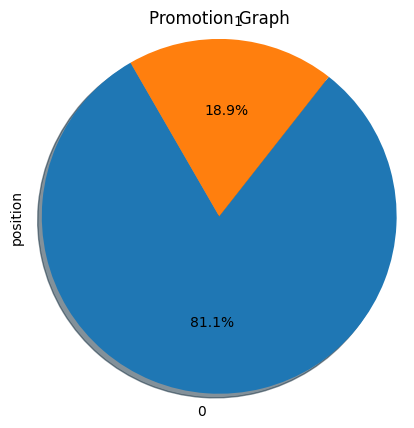

In [13]:
train[["promotion_flag","position"]].groupby("promotion_flag").sum().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Promotion Graph")
plt.show()

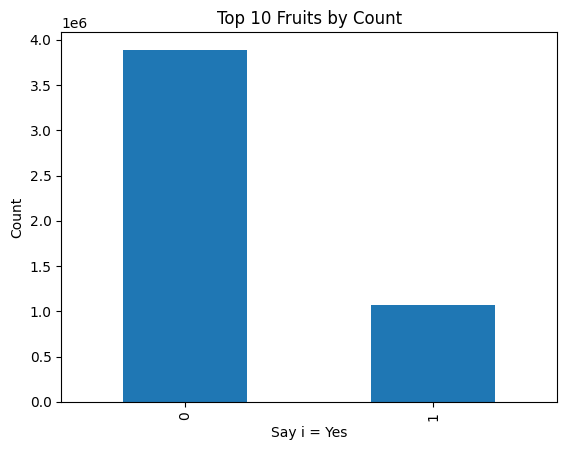

In [14]:
# Get the index value counts in descending order
index_value_counts = train['promotion_flag'].value_counts(ascending=False)

# Select the top ten index values
top10_index = index_value_counts.head(10)

# Plot the bar chart
top10_index.plot.bar()

# Add labels and title
plt.xlabel('Say i = Yes')
plt.ylabel('Count')
plt.title('Top 10 hotels')

# Show the plot
plt.show()


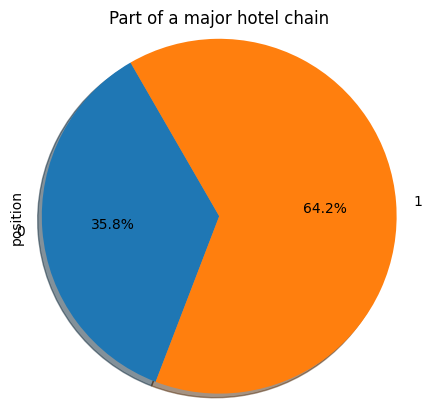

In [15]:
train[["prop_brand_bool","position"]].groupby("prop_brand_bool").sum().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Part of a major hotel chain")
plt.show()

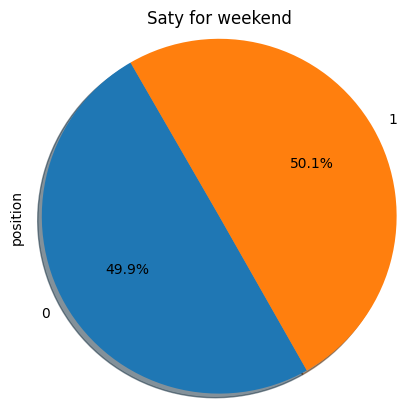

In [16]:
train[["srch_saturday_night_bool","position"]].groupby("srch_saturday_night_bool").sum().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Saty for weekend")
plt.show()

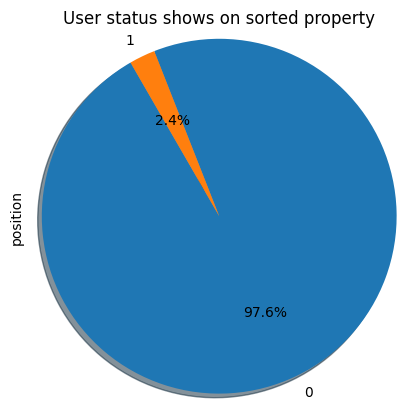

In [18]:
train[["click_bool","position"]].groupby("click_bool").sum().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("User status shows on sorted property")
plt.show()

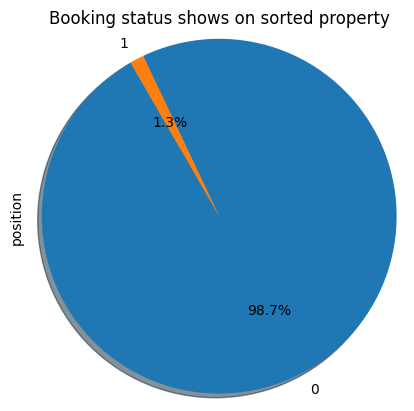

In [19]:
train[["booking_bool","position"]].groupby("booking_bool").sum().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Booking status shows on sorted property")
plt.show()

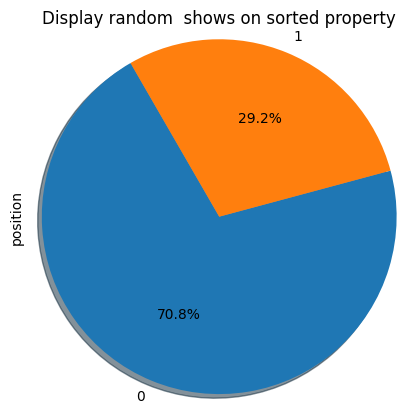

In [20]:
train[["random_bool","position"]].groupby("random_bool").sum().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Display random  shows on sorted property")
plt.show()

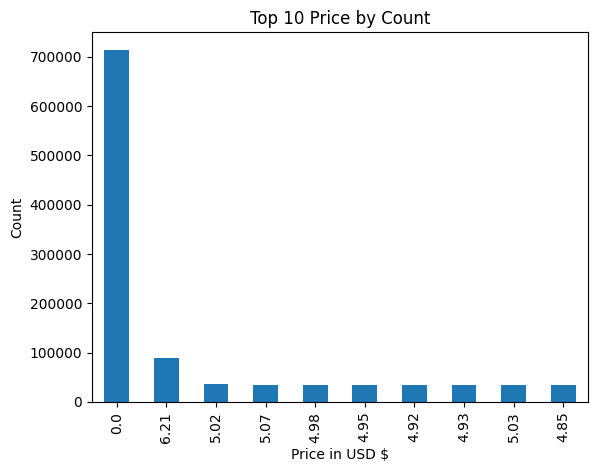

In [21]:
# Get the index value counts in descending order
index_value_counts = train['prop_log_historical_price'].value_counts(ascending=False)

# Select the top ten index values
top10_index = index_value_counts.head(10)

# Plot the bar chart
top10_index.plot.bar()

# Add labels and title
plt.xlabel('Price in USD $')
plt.ylabel('Count')
plt.title('Top 10 Price by Count')

# Show the plot
plt.show()


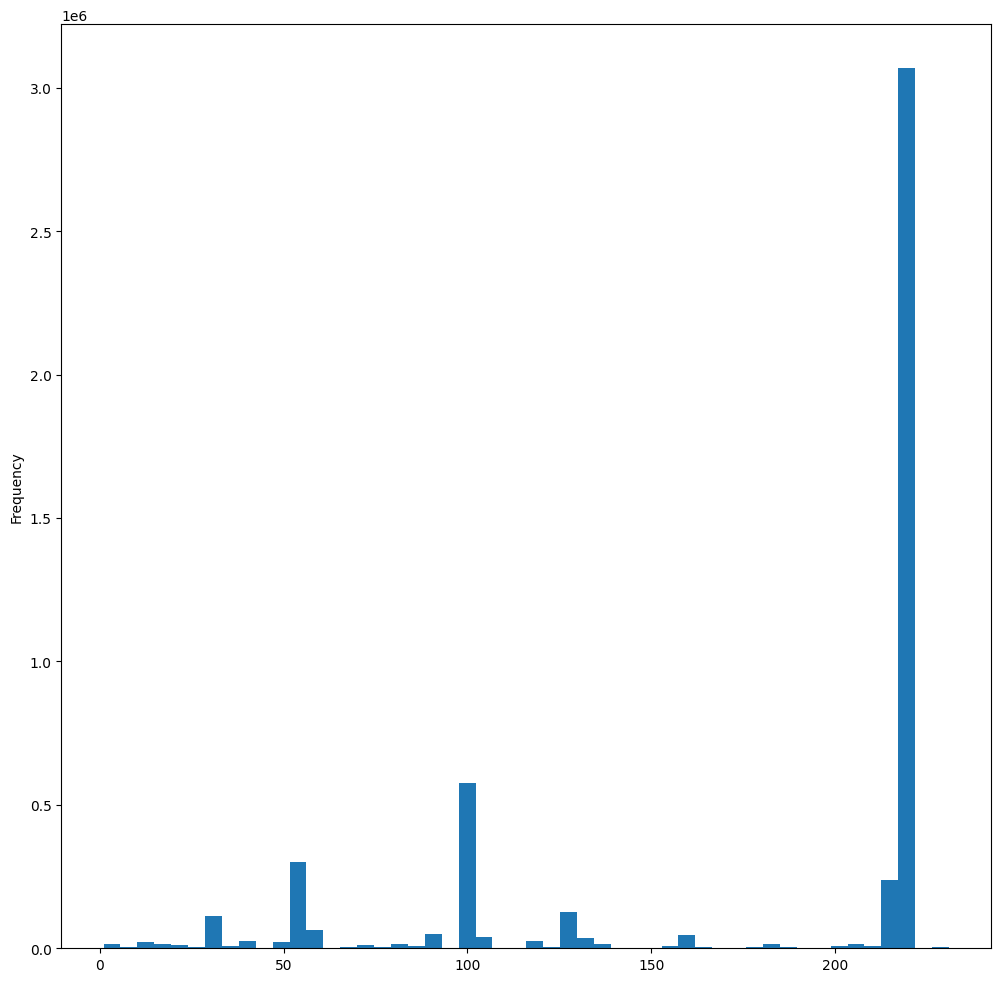

In [22]:
train.visitor_location_country_id.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

Text(0.5, 1.0, 'visitor_location_country_id Scatter Plot')

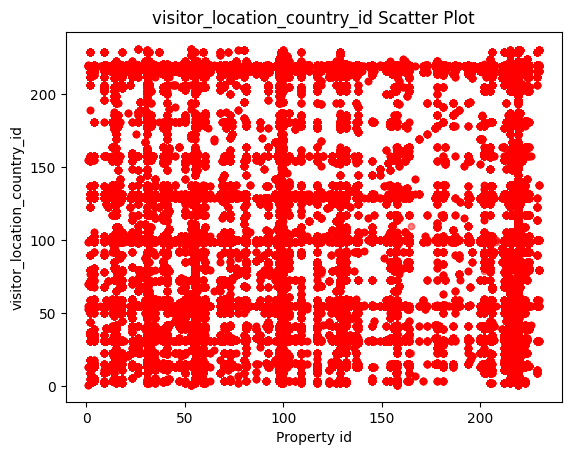

In [23]:
# Scatter Plot 
# x = attack, y = defense
train.plot(kind='scatter', x='prop_country_id', y='visitor_location_country_id',alpha = 0.5,color = 'red')
plt.xlabel('Property id')              # label = name of label
plt.ylabel('visitor_location_country_id')
plt.title('visitor_location_country_id Scatter Plot')    

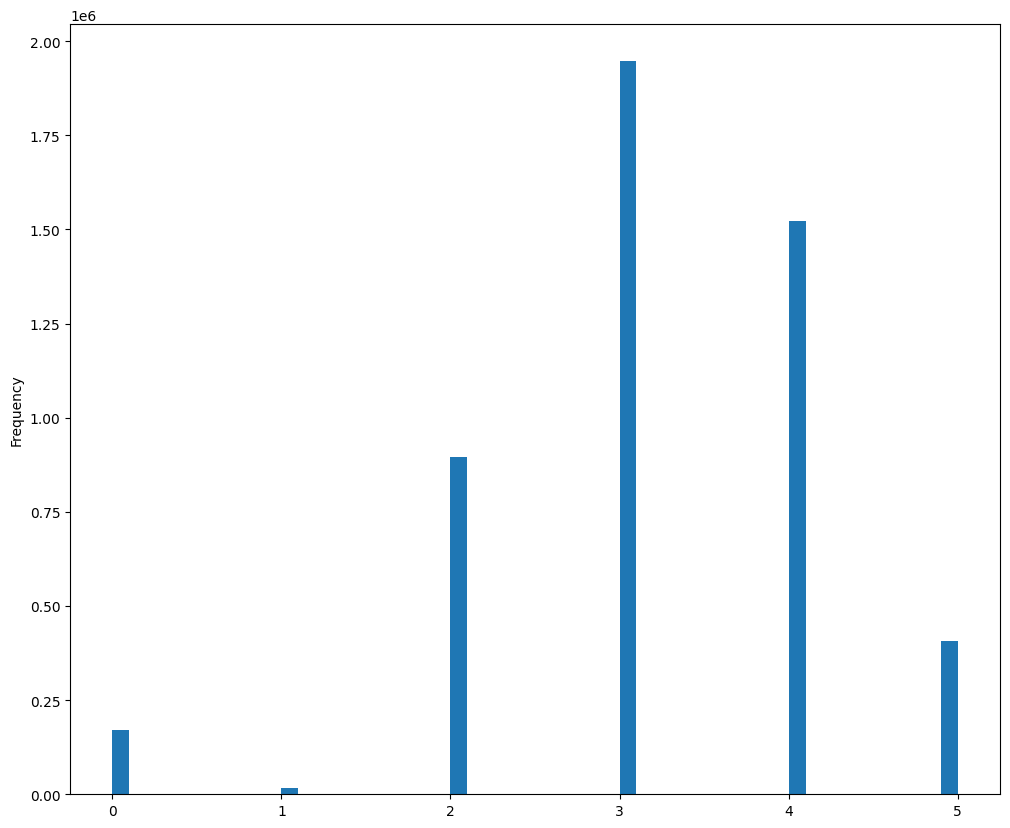

In [24]:
train.prop_starrating.plot(kind = 'hist',bins = 50,figsize = (12,10))
plt.show()

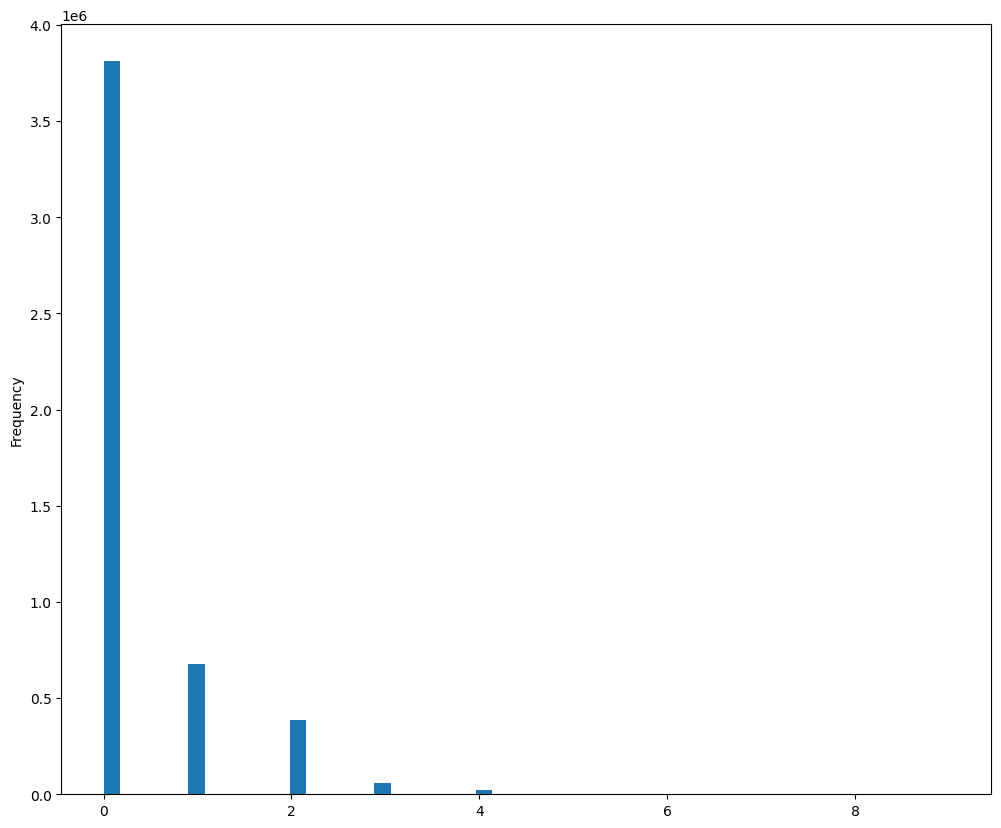

In [25]:
train.srch_children_count.plot(kind = 'hist',bins = 50,figsize = (12,10))
plt.show()

In [26]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_brand_bool',
       'prop_location_score1', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'random_bool', 'click_bool', 'booking_bool'],
      dtype='object')

# Data Analysis and Visualizations


/tmp/ipykernel_34/503634475.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<AxesSubplot: >

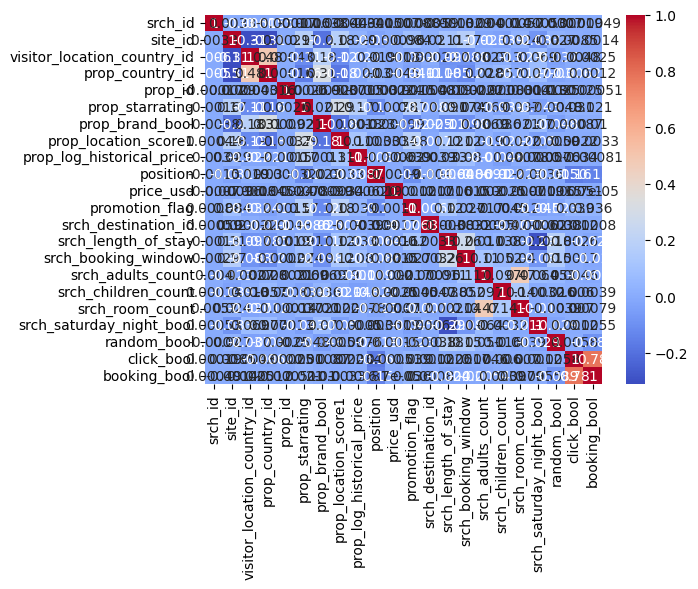

In [27]:
import seaborn as sns
import pandas as pd

# Load the data into a pandas dataframe
# data = pd.read_csv("data.csv")

# Compute the correlation matrix
corr = train.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap="coolwarm", annot=True)


****After Seeing the result we may see that either mistake or user is looking for Luxurious suits

In [28]:
train['price_usd'].describe()

count    4.958347e+06
mean     2.542096e+02
std      1.600124e+04
min      0.000000e+00
25%      8.500000e+01
50%      1.220000e+02
75%      1.849600e+02
max      1.972633e+07
Name: price_usd, dtype: float64

In [29]:
train= train.loc[train['price_usd'] < 5584]

# Time Series Data Visualization

Text(0.5, 1.0, 'Time Series of room price by date time of search')

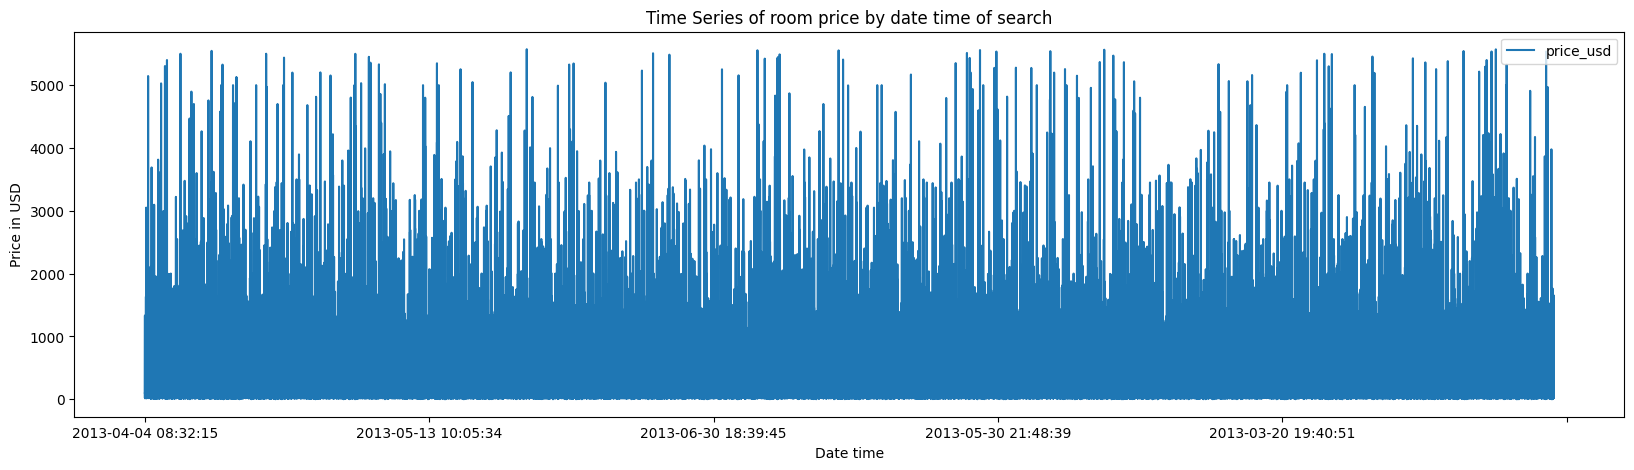

In [30]:
train.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')

# Price Analysis count of Saturday night or Non-Saturday Night

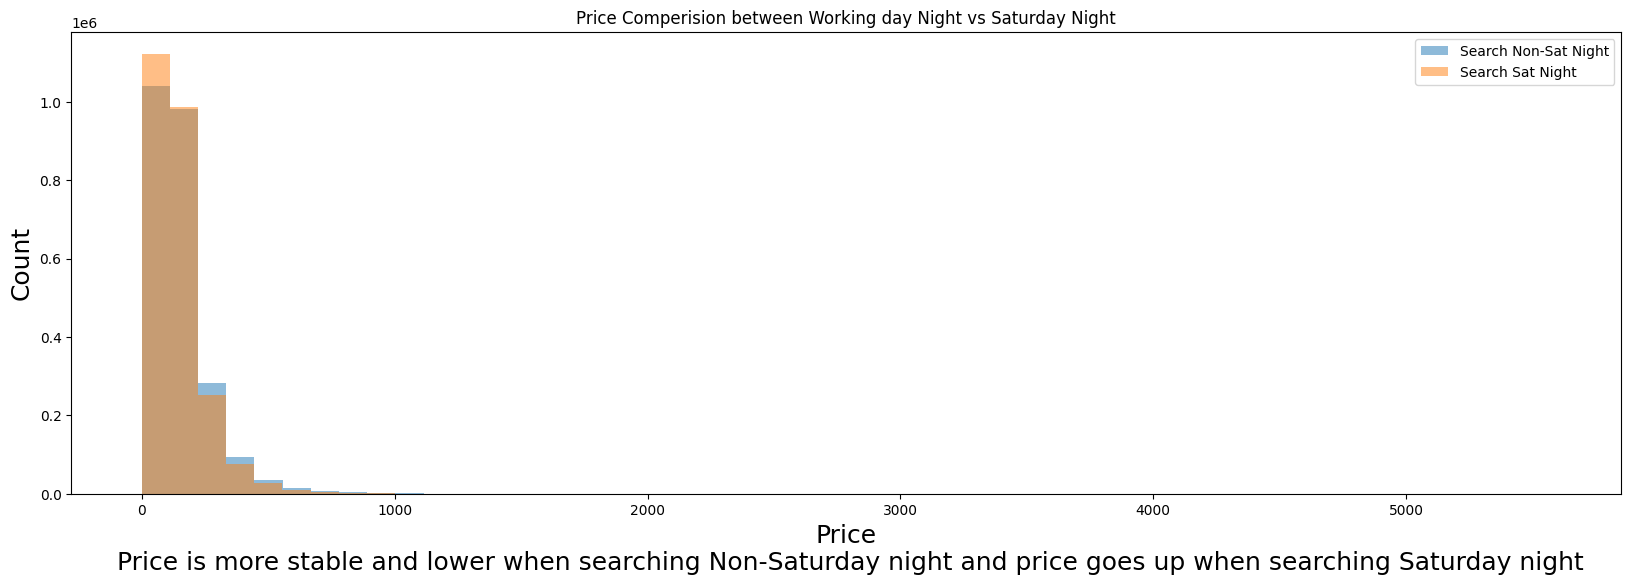

In [31]:
a = train.loc[train['srch_saturday_night_bool'] == 0, 'price_usd']
b = train.loc[train['srch_saturday_night_bool'] == 1, 'price_usd']
plt.figure(figsize=(20, 6))
plt.hist(a, bins = 50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(b, bins = 50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price\n Price is more stable and lower when searching Non-Saturday night and price goes up when searching Saturday night', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title("Price Comperision between Working day Night vs Saturday Night")
plt.show();

# Different Model Approach

Different Model Approach

In [32]:
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

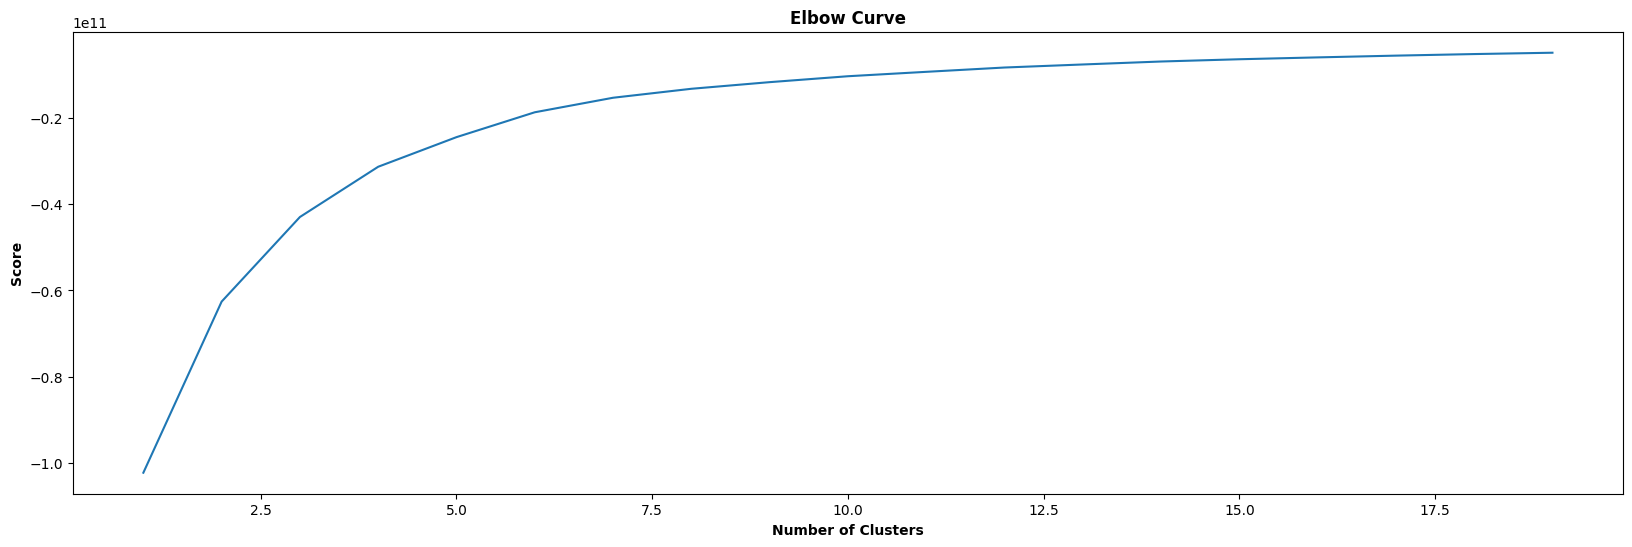

In [33]:
data = train[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters', fontname="Times New Roman",fontweight="bold")
plt.ylabel('Score',fontname="Times New Roman",fontweight="bold")
plt.title("Elbow Curve",fontname="Times New Roman",fontweight="bold")
plt.show();

1. Based on our observations, it appears that once we reach 10 clusters, the amount of variance does not significantly change.
2. Therefore, it is reasonable to conclude that training the model with 10 clusters would be sufficient.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


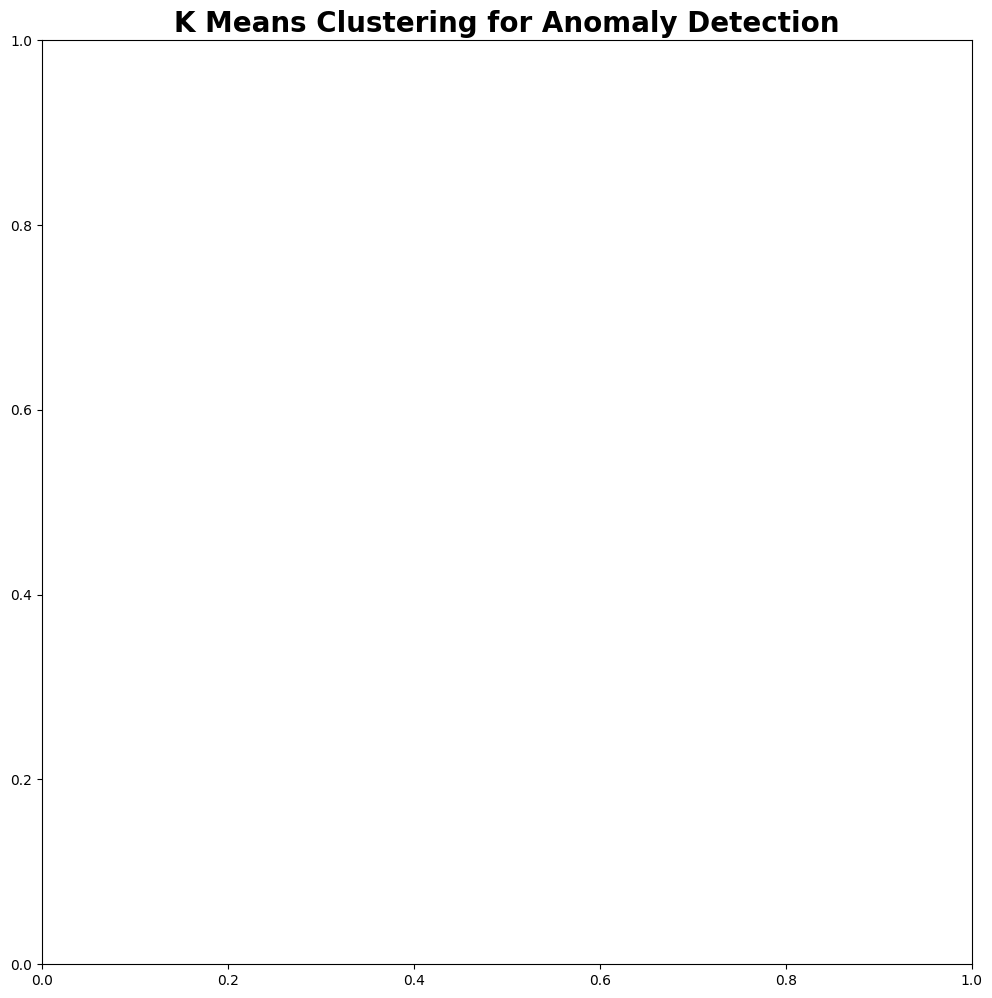

In [48]:
X = train[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=49, azim=140)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=labels.astype(np.float64), edgecolor="r")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means Clustering for Anomaly Detection", fontsize=20, fontweight="bold");

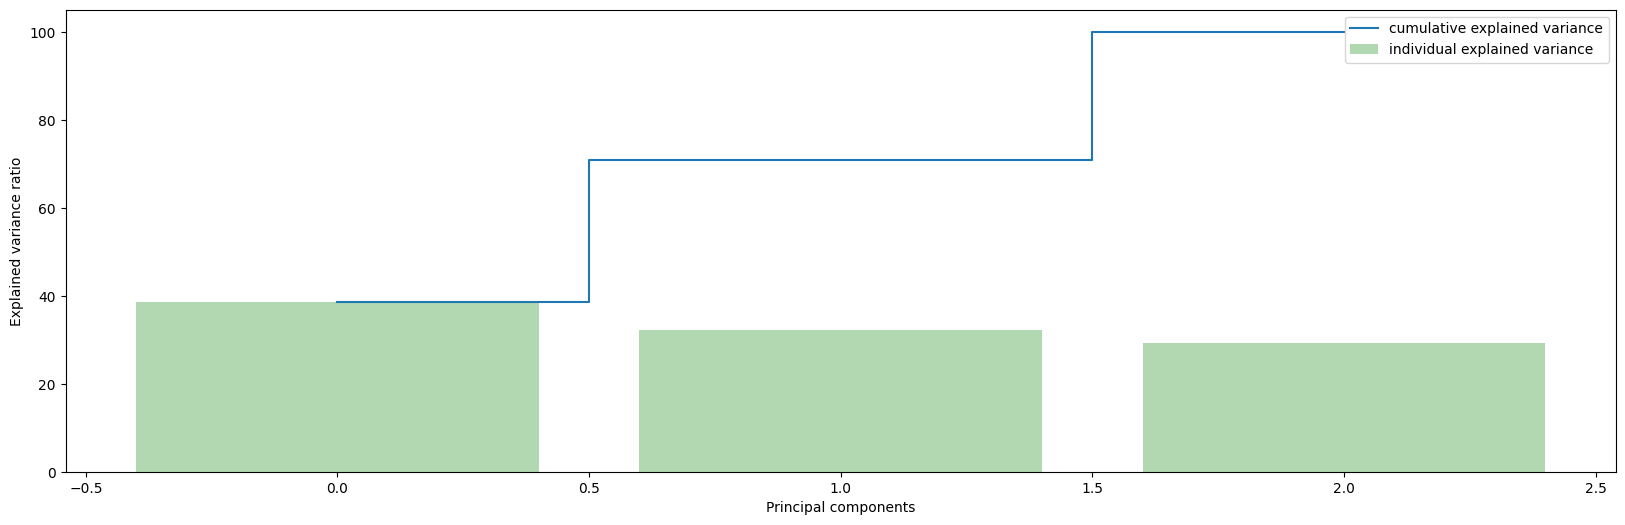

In [35]:
data = train[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(20, 6))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [49]:
# Take useful feature and standardize them
data = train[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [37]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
train['cluster'] = kmeans[9].predict(data)
train.index = data.index
train['principal_feature1'] = data[0]
train['principal_feature2'] = data[1]
train['cluster'].value_counts()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

5    1282889
8    1149928
1     766059
0     756490
6     397152
7     345547
9     126896
2     113177
3      15749
4       1728
Name: cluster, dtype: int64

In [1]:
train.head()

NameError: name 'train' is not defined

KeyError: -0.0006496744662201031

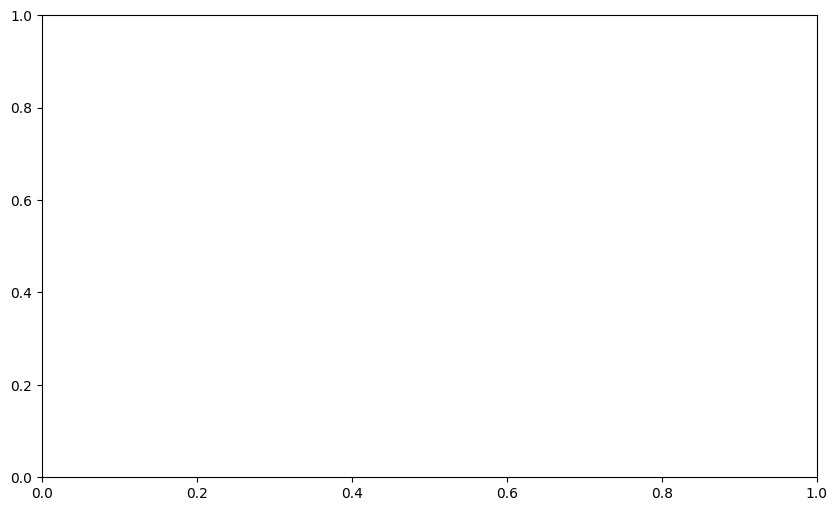

In [50]:
# plot the different clusters with the 2 main features apply (PCA)
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey'}
ax.scatter(train['principal_feature1'], train['principal_feature2'], c=train["cluster"].apply(lambda x: colors[x]))
plt.show();